<a href="https://colab.research.google.com/github/sultanardian/Deep-Learning-and-Data-Science/blob/main/Hand%20Poses%20Identification%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab.patches import cv2_imshow
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

Sample images:

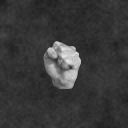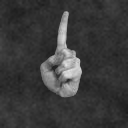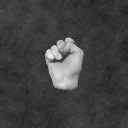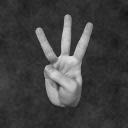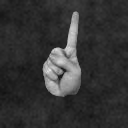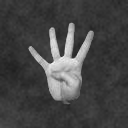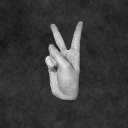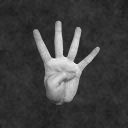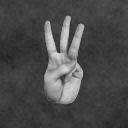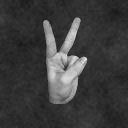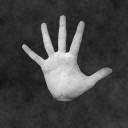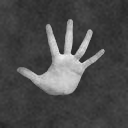

In [ ]:
DIR = '../Fingers'
RESIZE = 128

In [ ]:
asset = []

for img in os.listdir(DIR):
    path = os.path.join(DIR, img)
    img_file = cv2.imread(path)
    img_res = cv2.resize(img_file, (RESIZE, RESIZE))
    img_gray = cv2.cvtColor(img_res, cv2.COLOR_BGR2GRAY)
    img_class = img.split('_')[1][:2]
    asset.append([img_gray, img_class])

In [ ]:
img = []
label = []

for i, j in asset:
    img.append(i)
    label.append(j)

In [ ]:
img = np.array(img)
label = np.array(label)

In [ ]:
label_unique = np.unique(label)
label_new = []

for i in label:
    label_new.append(np.where(label_unique == i)[0][0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img, label_new, test_size = 0.2, random_state = 42)

In [ ]:
y_train_new = np_utils.to_categorical(y_train)
y_test_new = np_utils.to_categorical(y_test)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (128, 128, 1), activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 12, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 dropout (Dropout)           (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 64)                8128576   
                                                                 
 dense_1 (Dense)             (None, 12)                780       
                                                        

In [ ]:
model.fit(x = X_train, y = y_train_new, batch_size = 32, epochs = 10)

In [ ]:

model.save('../model 1')